 # Práctica 3: Regrsión lineal
 
 - Grupo 1:
     - Jesús María Matos Torres.
     - Carlos Santana Esplá.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Ejercicio 1: Análisis de dependencia lineal mediante coeficientes de determinación.

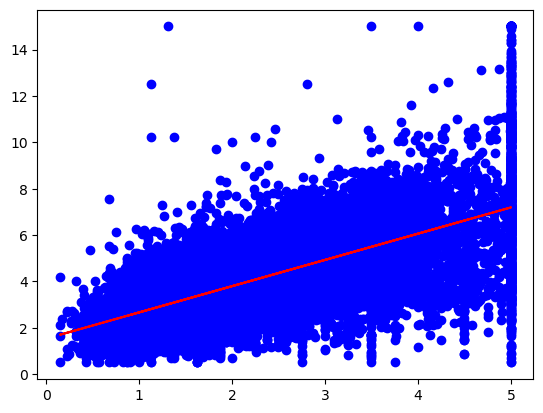

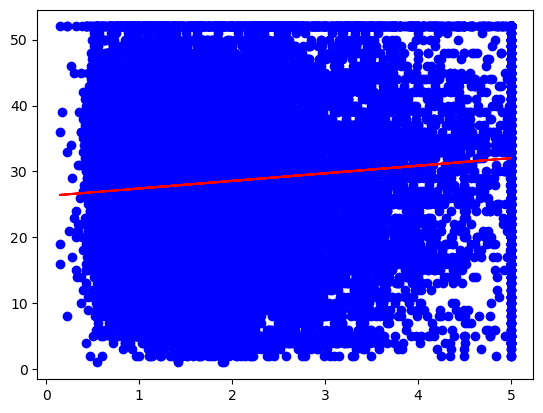

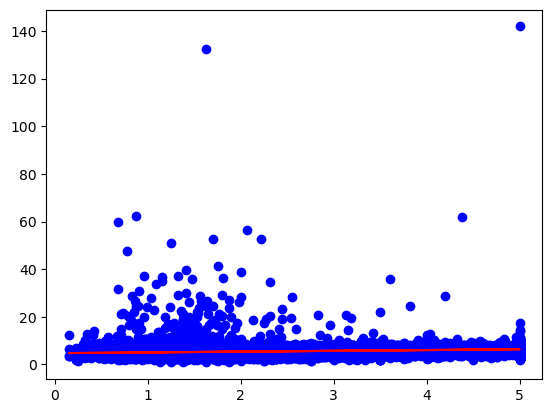

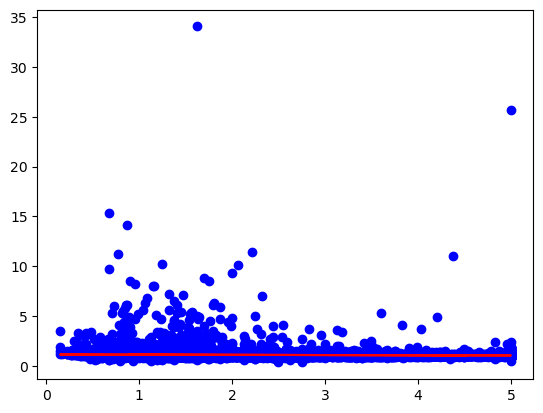

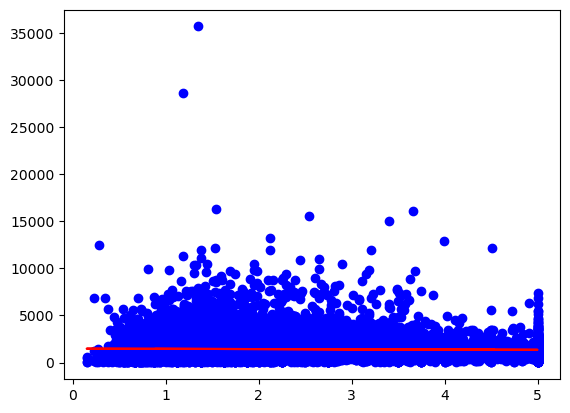

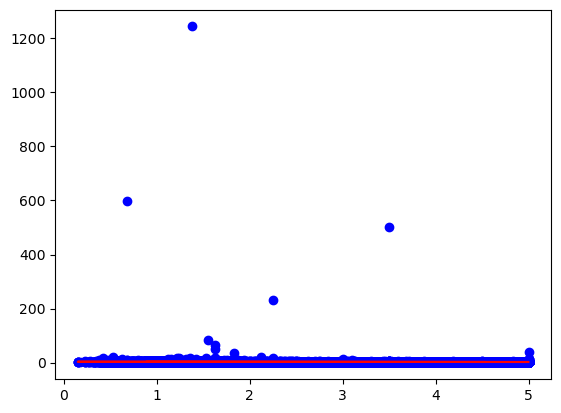

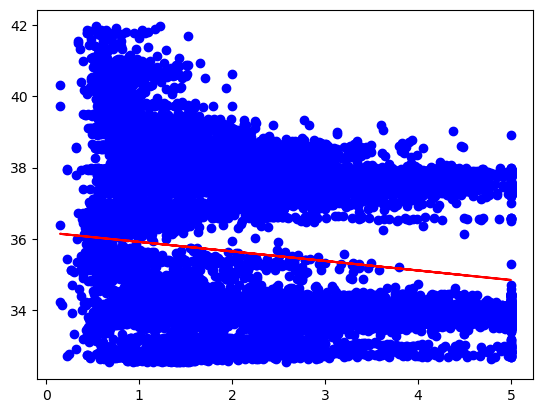

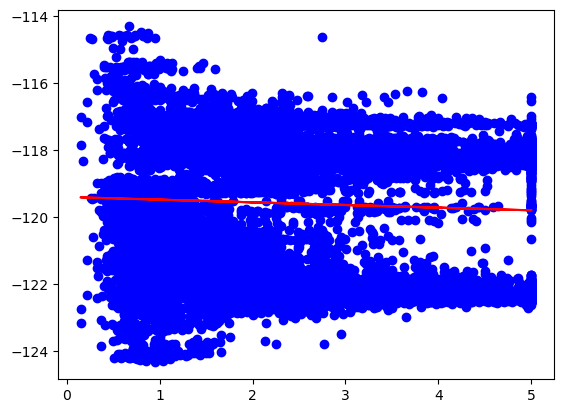

[0.4734474918071989, 0.011156305266710742, 0.023088282755354017, 0.0021809379116133343, 0.0006076066693256887, 0.0005634647738501641, 0.02078218542857846, 0.0021129297054044427]


In [3]:
df=pd.read_csv('./datos practicas/Aprendizaje-Automatico-I-main/Practica 3/precio_casas.csv', sep=';')
df = df.to_numpy()

r2 = []
x = df[:,8]
for i in range(8):
    regr = LinearRegression().fit(x.reshape(-1,1), df[:,i])
    ypred = regr.predict(df[:,8].reshape(-1,1))
    r2.append(r2_score(df[:,i], ypred))
    regr.fit(x.reshape(-1,1), df[:,i])
    
    ax = plt.subplot()
    ax.scatter(x, df[:,i], color='blue')
    ax.plot(x, x * regr.coef_[0] + regr.intercept_, color='red')
    plt.show()
    
print(r2)

- Como se puede ver, primero tratamos los datos leyendo la tabla del archivo csv. Acto seguido realizamos un bucle for para calcular el coeficiente de determinación y además mostrar los diagramas de dispersión de cada columna en función de la variable mediana precio. Como podemos observar, excepto la primera gráfica, que es la columna mediana ingresos en función de mediana precio, las demás no tienen mucho sentido.

## Ejercicio 2: Estimación por regresión lineal con diferente número de características

In [17]:
train, test = train_test_split(df,test_size=0.3, train_size=0.7)
r2_ord = [0,2,6,1,3,7,4,5]
train2 = [[]]
test2 = [[]]
ttrain = train[:,8]
for i in range(8):
    train2.append(train[:,r2_ord[i]])
    test2.append(test[:,r2_ord[i]])
    regr = LinearRegression().fit(ttrain.reshape(-1,1), train2)
    ypred = regr.predict()
    mean_squared_error(test2, ypred, squared=False)

C:\Users\fenix\anaconda3\lib\site-packages\sklearn\utils\validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)


AttributeError: 'bool' object has no attribute 'any'

- Dividimos los datos en train, test y mediante un bucle for, vamos añadiendo a una matriz las columnas de los datos según la posición creciente de r2. Entrenamos la regresión, predecimos y calculamos el error cuadrático medio. 

- Faltaría corregir y pulir la últimma parte del código y realizar la tabla.